In [78]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

In [80]:
df=pd.read_csv('Main_DS.csv')
print(df.head())
df.info()

      Scale   Crop        Country         Region  latitude  longitude  \
0  Regional  Maize       Pakistan           Asia      31.4       73.1   
1  Regional  Maize       Pakistan           Asia      31.4       73.1   
2  Regional  Maize  United States  North America      43.3     -104.1   
3  Regional  Maize  United States  North America      43.3     -104.1   
4  Regional  Maize          China           Asia      30.0      110.0   

   CAT(dC)_area_weighted  CAP (mm) _area_weighted   \
0                   25.5                     429.0   
1                   25.5                     429.0   
2                   10.2                     468.0   
3                   10.2                     468.0   
4                   14.7                    1371.0   

   CAP (mm) _point_coordinate  Future_Mid-point  ...  Irrigation Cultivar  \
0                       429.0              2054  ...          No       No   
1                       429.0              2054  ...          No      Yes   
2    

In [82]:
df['Region'].unique()

array(['Asia', 'North America', 'Africa', 'Central and South America',
       'Global', 'Europe', 'Australasia'], dtype=object)

In [84]:
print(df.columns.tolist())

['Scale', 'Crop', 'Country', 'Region', 'latitude', 'longitude', 'CAT(dC)_area_weighted', 'CAP (mm) _area_weighted ', 'CAP (mm) _point_coordinate', 'Future_Mid-point', 'Baseline_Mid-point', 'Time slice', 'Climate scenario', 'Local delta T ', 'Local delta T from 2005', 'AP change each study  (mm) ', ' AP change  from 2005 (mm)', 'Projected yield (t/ha)', 'Climate impacts (%)', 'Climate impacts relative to 2005', 'Climate impacts per dC (%)', 'CO2', 'CO2 ppm', 'Fertiliser', 'Irrigation', 'Cultivar', 'Soil organic matter management', 'Planting time', 'Tillage', 'Adaptation', 'Seasonal P change (mm) each study (LBP)', 'Base P (annual) (mm) (LBP)', 'AP change (%) (relative to LB)', 'BP (seasonal) (mm) (LBP)']


In [94]:
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\xa0', ' ')

In [96]:
print(df.columns.tolist())

['Scale', 'Crop', 'Country', 'Region', 'latitude', 'longitude', 'CAT(dC)_area_weighted', 'CAP (mm) _area_weighted', 'CAP (mm) _point_coordinate', 'Future_Mid-point', 'Baseline_Mid-point', 'Time slice', 'Climate scenario', 'Local delta T', 'Local delta T from 2005', 'AP change each study (mm)', 'AP change from 2005 (mm)', 'Projected yield (t/ha)', 'Climate impacts (%)', 'Climate impacts relative to 2005', 'Climate impacts per dC (%)', 'CO2', 'CO2 ppm', 'Fertiliser', 'Irrigation', 'Cultivar', 'Soil organic matter management', 'Planting time', 'Tillage', 'Adaptation', 'Seasonal P change (mm) each study (LBP)', 'Base P (annual) (mm) (LBP)', 'AP change (%) (relative to LB)', 'BP (seasonal) (mm) (LBP)']


In [104]:
new_df=df[['Region','CAT(dC)_area_weighted','CAP (mm) _area_weighted','Local delta T','AP change each study (mm)','CO2 ppm','Climate impacts (%)']] 
new_df.head()

,Region,CAT(dC)_area_weighted,CAP (mm) _area_weighted,Local delta T,AP change each study (mm),CO2 ppm,Climate impacts (%)
0,Asia,25.5,429.0,2.94,87.6,564.3,-19.60
1,Asia,25.5,429.0,2.94,87.6,564.3,14.00
2,North America,10.2,468.0,NaN,NaN,570.5,-22.40
3,North America,10.2,468.0,NaN,NaN,570.5,25.00
4,Asia,14.7,1371.0,1.15,NaN,486.5,-5.36


In [110]:
new_df.isnull().sum()

Region                          0
CAT(dC)_area_weighted          37
CAP (mm) _area_weighted        37
Local delta T                4311
AP change each study (mm)    5149
CO2 ppm                       165
Climate impacts (%)             0
dtype: int64

In [112]:
new_df.isnull().mean()*100

Region                        0.000000
CAT(dC)_area_weighted         0.425141
CAP (mm) _area_weighted       0.425141
Local delta T                49.534643
AP change each study (mm)    59.163507
CO2 ppm                       1.895898
Climate impacts (%)           0.000000
dtype: float64

<Figure size 1200x600 with 0 Axes>

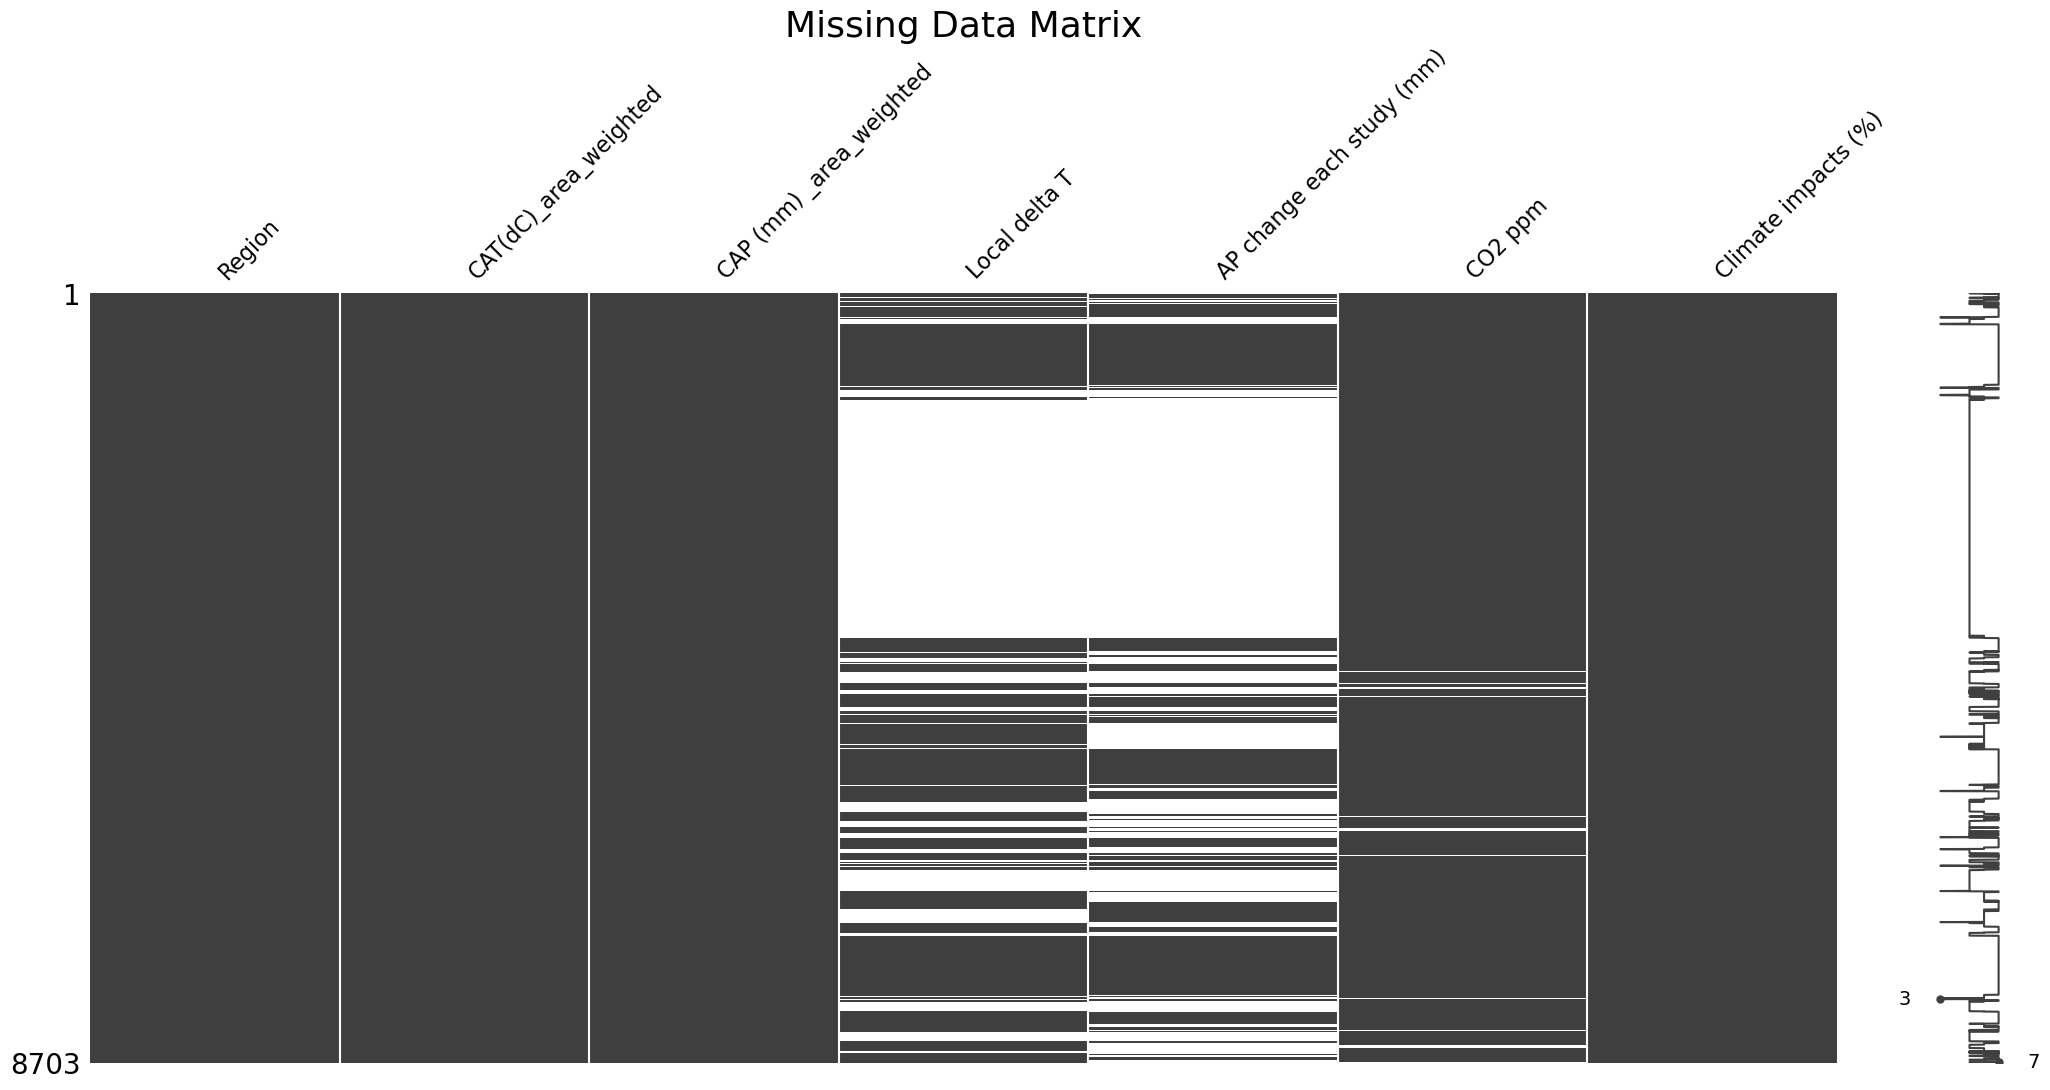

In [114]:
# Missing data matrix (shows patterns of missingness)
plt.figure(figsize=(12, 6))
msno.matrix(new_df)
plt.title("Missing Data Matrix", fontsize=26)
plt.show()

In [116]:
# Dropping the columns with higher missing values
"""df.drop(columns=[
    'Seasonal P change (mm) each study (LBP)',
    'Base P (annual) (mm) (LBP)',
    'AP change (%) (relative to LB)',
    'BP (seasonal) (mm) (LBP)'
], inplace=True)"""

"df.drop(columns=[\n    'Seasonal P change (mm) each study (LBP)',\n    'Base P (annual) (mm) (LBP)',\n    'AP change (%) (relative to LB)',\n    'BP (seasonal) (mm) (LBP)'\n], inplace=True)"

<Figure size 1200x600 with 0 Axes>

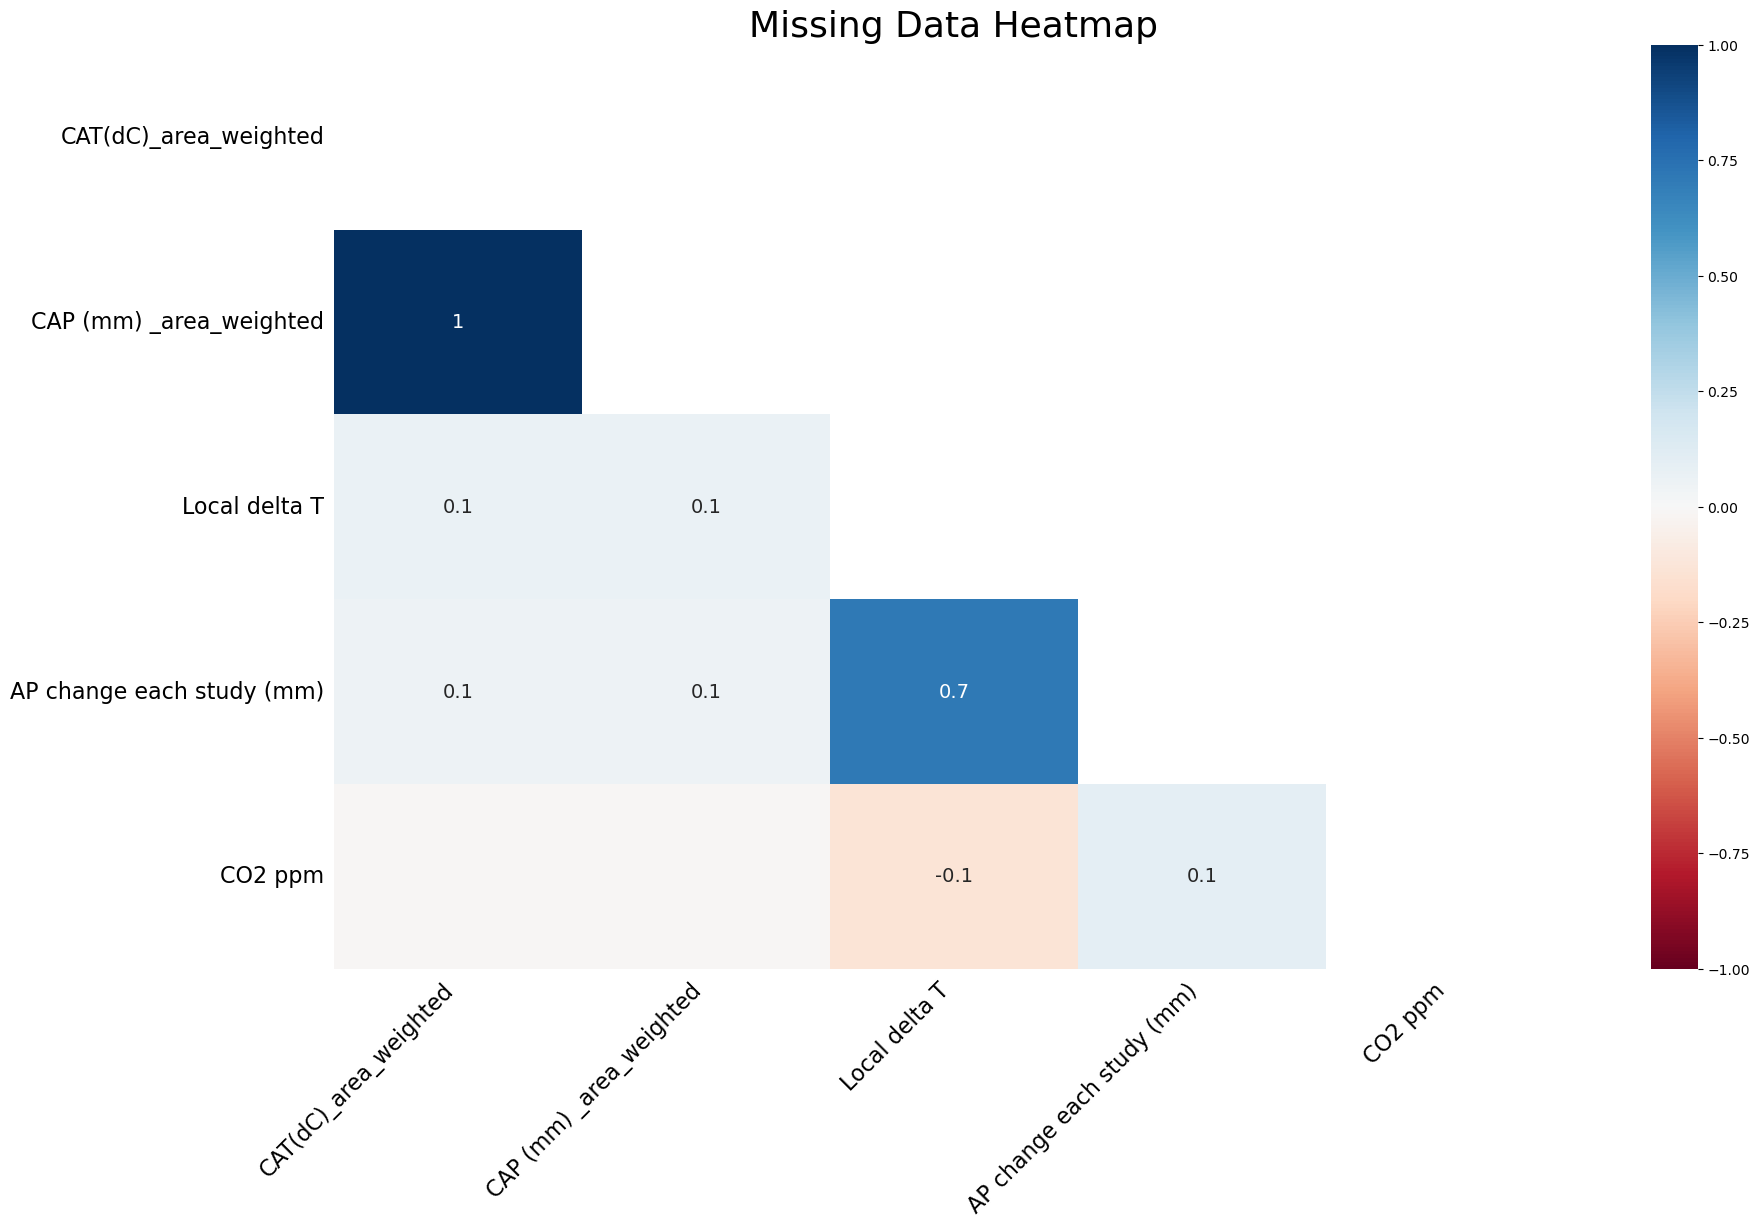

In [118]:
# Missing data heatmap (correlations in missingness)
plt.figure(figsize=(12, 6))
msno.heatmap(new_df)
plt.title("Missing Data Heatmap", fontsize=26)
plt.show()

In [132]:
#Handling missing values for CO2 & Baseline Mid-point using simple median imputer
new_df.loc[:,'CO2 ppm'] = new_df['CO2 ppm'].fillna(new_df['CO2 ppm'].median())
new_df.loc[:, 'CAT(dC)_area_weighted'] = new_df['CAT(dC)_area_weighted'].fillna(new_df['CAT(dC)_area_weighted'].median())
new_df.loc[:, 'CAP (mm) _area_weighted'] = new_df['CAP (mm) _area_weighted'].fillna(new_df['CAP (mm) _area_weighted'].median())
###df['Baseline_Mid-point'] = df['Baseline_Mid-point'].fillna(df['Baseline_Mid-point'].median())

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for imputation
features_for_imputation = new_df.select_dtypes(include='number')

# Scale the data first
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_for_imputation)

# Apply KNN imputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)

# Convert back to DataFrame with original column names
imputed_df = pd.DataFrame(imputed_data, columns=features_for_imputation.columns)

# Replace the original numeric columns in new_df with imputed ones
new_df[features_for_imputation.columns] = imputed_df


In [75]:
#Using KNN imputation to treat missing values
# Step 1: Select the MAR columns
selected_cols = ['Local delta T', 'AP change each study  (mm)', 'Projected yield (t/ha)']
df_selected = df[selected_cols].copy()

# Step 2: Scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=selected_cols, index=df.index)

# Step 3: Simulate missing values to test KNN
np.random.seed(42)
mask = (np.random.rand(*df_scaled.shape) < 0.10) & (~df_scaled.isnull())  # Mask 10% of known values
true_values = df_scaled[mask]
df_masked = df_scaled.mask(mask)

# Step 4: Try different values of k
errors = []
k_values = [2, 3, 5, 7, 10]

for k in k_values:
    imputer = KNNImputer(n_neighbors=k)
    df_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_masked), columns=selected_cols, index=df.index)
    
    # Extract only the values that were masked
    imputed_values = df_imputed_scaled[mask]
    valid_rows = imputed_values.dropna()
    true_values_clean = true_values.loc[valid_rows.index]
    
    if len(valid_rows) > 0:
        mse = mean_squared_error(true_values_clean, valid_rows)
        errors.append(mse)
    else:
        print(f"⚠️ No valid imputed values for k = {k}")
        errors.append(np.nan)

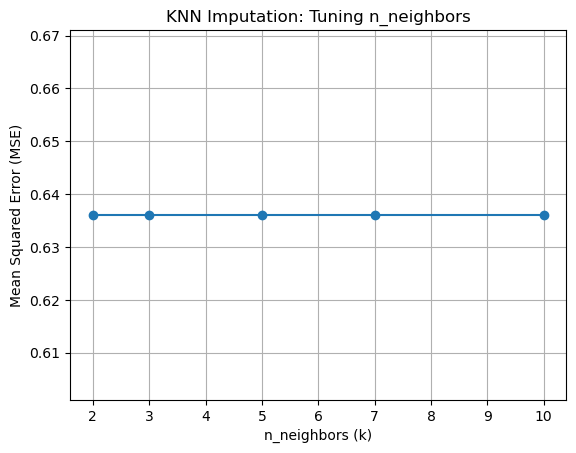

✅ Best k is 2 with MSE: 0.63607191882949


In [77]:
#finding the best value for k(n_neigbors)
plt.plot(k_values, errors, marker='o')
plt.xlabel("n_neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("KNN Imputation: Tuning n_neighbors")
plt.grid(True)
plt.show()

# Get best k
valid_k = [k for k, e in zip(k_values, errors) if not np.isnan(e)]
valid_errors = [e for e in errors if not np.isnan(e)]

best_k = valid_k[np.argmin(valid_errors)]
print(f"✅ Best k is {best_k} with MSE: {min(valid_errors)}")

In [79]:
# Iterative imputation to fill missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

selected_cols = ['Local delta T', 'AP change each study  (mm)']
df_selected = df[selected_cols]

# Create the imputer
imp_iter = IterativeImputer(random_state=42)

# Fit and transform
df_imputed = pd.DataFrame(imp_iter.fit_transform(df_selected), columns=selected_cols)

# Replace back in original df
df[selected_cols] = df_imputed


In [83]:
#checking for missing values after treating them
df.isnull().sum()

Scale                               0
Crop                                0
Country                             0
Region                              0
latitude                            0
longitude                           0
CAT(dC)_area_weighted               0
CAP (mm) _area_weighted             0
CAP (mm) _point_coordinate          0
Future_Mid-point                    0
Baseline_Mid-point                  0
Time slice                          0
Climate scenario                    0
Local delta T                       0
Local delta T from 2005             0
AP change each study  (mm)          0
AP change  from 2005 (mm)           0
Projected yield (t/ha)              0
Climate impacts (%)                 0
Climate impacts relative to 2005    0
Climate impacts per dC (%)          0
CO2                                 0
CO2 ppm                             0
Fertiliser                          0
Irrigation                          0
Cultivar                            0
Soil organic